## Write a script that parses momentum values to determine the mean value of a mass

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# the givens
MASS_A = 2
MASS_B = 1nmass_c_vals = [] # becomes a list of calculated masses
Nbins = 50 # keep those histograms high-res!

In [2]:
def calc_p(arg):
    # i know it's gross but it's only written once
    return np.sqrt(pow(MASS_A, 2) - 2*MASS_A*np.sqrt(pow(MASS_B, 2)+ pow(arg, 2))+pow(MASS_B, 2))

Mean mass: 0.8600279350850656 kg
StDev: 0.0006733286393718619 kg


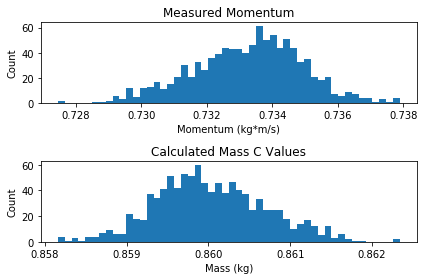

In [3]:
filename = 'pBs_2body_decay.txt'
q0s = np.loadtxt(filename)

fig, axs = plt.subplots(2, 1)

# underscore assigned here so that the array is never printed
_ = axs[0].hist(q0s, bins=Nbins)
axs[0].set_title('Measured Momentum')
axs[0].set_xlabel('Momentum (kg*m/s)')
axs[0].set_ylabel('Count')

plt.tight_layout()

for entry in q0s:
    mass_c_vals.append(calc_p(entry))
print('Mean mass:', np.mean(mass_c_vals), 'kg')
print('StDev:', np.std(mass_c_vals), 'kg')

# underscore assigned here for same reason as above
_ = axs[1].hist(mass_c_vals, bins = Nbins)
axs[1].set_title('Calculated Mass C Values')
axs[1].set_xlabel('Mass (kg)')
axs[1].set_ylabel('Count')

plt.tight_layout()

plt.savefig('./example_1D.pdf',bbox_inches='tight', transparent=True)
plt.show()
